<a href="https://colab.research.google.com/github/ashaaher/Deep-Learning/blob/master/F_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:


import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Employee-Attrition.csv to Employee-Attrition.csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Employee-Attrition.csv']))


In [0]:
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [0]:
df2.info()
df2.fillna(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


NameError: ignored

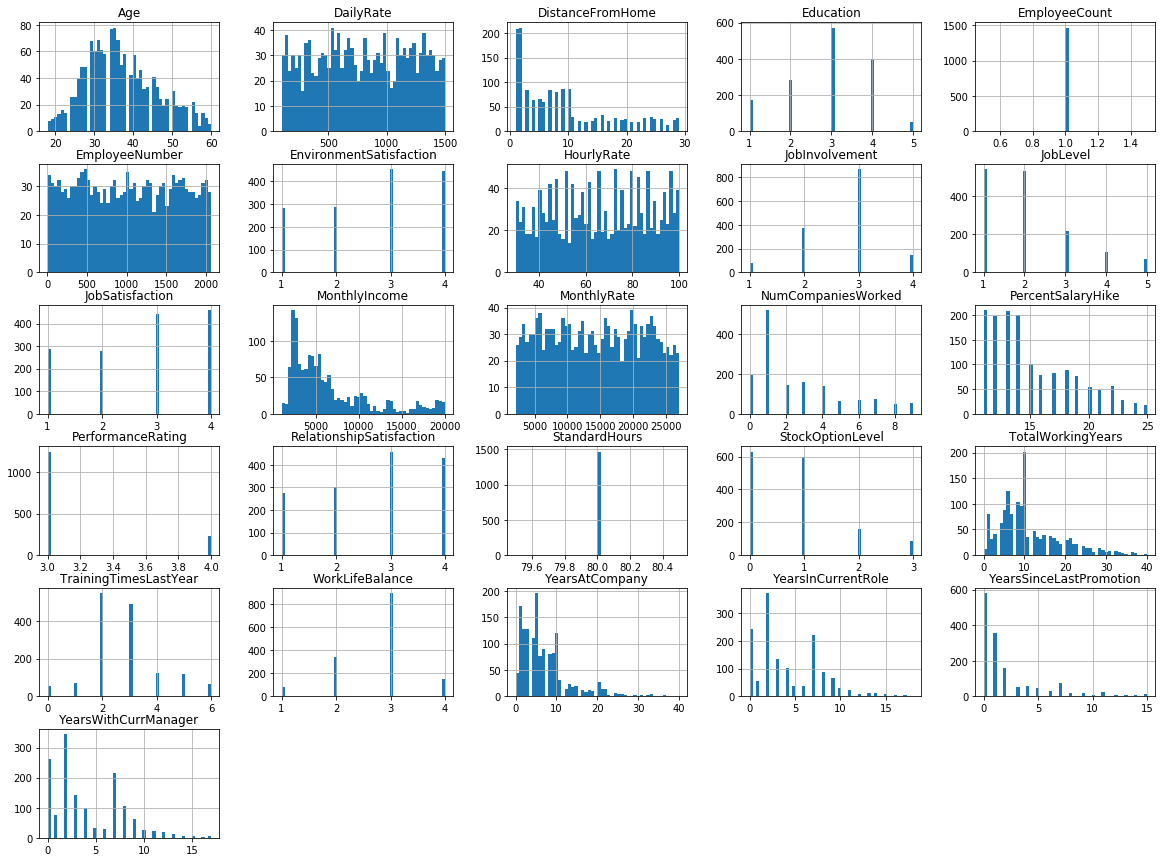

In [0]:

%matplotlib inline
import matplotlib.pyplot as plt
df2.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [0]:

# to make this notebook's output identical at every run
np.random.seed(42)

NameError: ignored

In [0]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [0]:
train_set, test_set = split_train_test(df2, 0.2)
len(train_set)

1176

In [0]:
len(test_set)

294

In [0]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [0]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [0]:

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [0]:
Emp_with_id = df2.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(Emp_with_id, 0.2, "index")

In [0]:
Emp_with_id["id"] = df2["DailyRate"] * 1000 + df2["EnvironmentSatisfaction"]
train_set, test_set = split_train_test_by_id(Emp_with_id, 0.2, "id")

In [0]:
test_set.head()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,id
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1102002
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1373004
5,5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6,1005004
7,7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0,1358004
9,9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7,1299003


In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df2, test_size=0.2, random_state=42)

In [0]:
test_set.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1041,28,No,Travel_Rarely,866,Sales,5,3,Medical,1,1469,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3
184,53,No,Travel_Rarely,1084,Research & Development,13,2,Medical,1,250,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3
1222,24,Yes,Travel_Rarely,240,Human Resources,22,1,Human Resources,1,1714,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0
67,45,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0
220,36,No,Travel_Rarely,1396,Research & Development,5,2,Life Sciences,1,304,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7


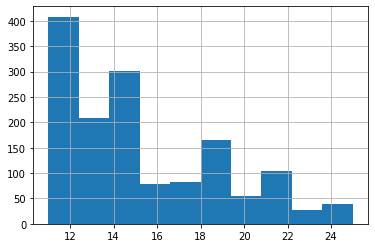

In [0]:
df2["PercentSalaryHike"].hist()       

In [0]:


df2["cat"] = pd.cut(df2["HourlyRate"],

                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [0]:
df2["cat"].value_counts()

5    1470
4       0
3       0
2       0
1       0
Name: cat, dtype: int64

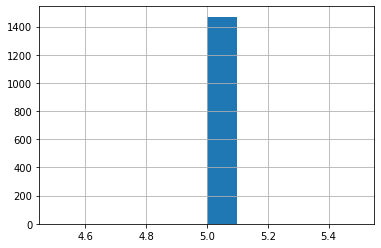

In [0]:
df2["cat"].hist()

In [0]:

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df2, df2["cat"]):
    strat_train_set = df2.loc[train_index]
    strat_test_set = df2.loc[test_index]

In [0]:
strat_test_set["cat"].value_counts() / len(strat_test_set)

5    1.0
4    0.0
3    0.0
2    0.0
1    0.0
Name: cat, dtype: float64

In [0]:
df2["cat"].value_counts() / len(df2)

5    1.0
4    0.0
3    0.0
2    0.0
1    0.0
Name: cat, dtype: float64

In [0]:
def cat_proportions(data):
    return data["cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df2, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": cat_proportions(df2),
    "Stratified": cat_proportions(strat_test_set),
    "Random": cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [0]:

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.0,0.0,0.0,NaN,NaN
2,0.0,0.0,0.0,NaN,NaN
3,0.0,0.0,0.0,NaN,NaN
4,0.0,0.0,0.0,NaN,NaN
5,1.0,1.0,1.0,0.0,0.0


In [0]:

for set_ in (strat_train_set, strat_test_set):
    set_.drop("cat", axis=1, inplace=True)

In [0]:

df2 = strat_train_set.copy()

NameError: ignored

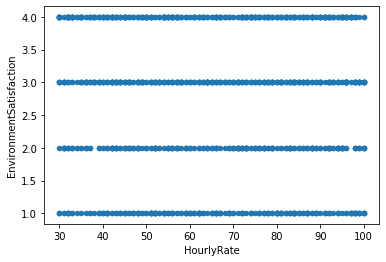

In [0]:

df2.plot(kind="scatter", x="HourlyRate", y="EnvironmentSatisfaction")
save_fig("bad_visualization_plot")

NameError: ignored

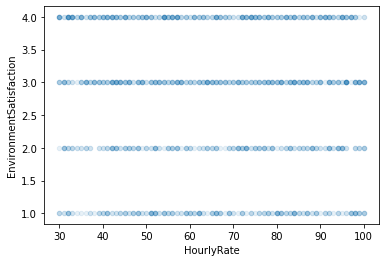

In [0]:
df2.plot(kind="scatter", x="HourlyRate", y="EnvironmentSatisfaction", alpha=0.1)
save_fig("better_visualization_plot")

NameError: ignored

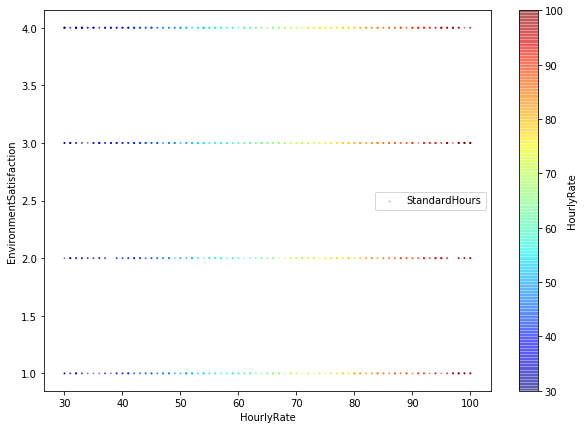

In [0]:
df2.plot(kind="scatter", x="HourlyRate", y="EnvironmentSatisfaction", alpha=0.4,
    s=df2["StandardHours"]/100, label="StandardHours", figsize=(10,7),
    c="HourlyRate", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("Emp_scatterplot")

In [0]:


corr_matrix = df2.corr()

In [0]:

corr_matrix["HourlyRate"].sort_values(ascending=False)

HourlyRate                  1.000000
StockOptionLevel            0.066348
JobInvolvement              0.042510
NumCompaniesWorked          0.038294
Age                         0.029252
DistanceFromHome            0.026941
RelationshipSatisfaction    0.025641
EmployeeNumber              0.023691
DailyRate                   0.020803
PerformanceRating           0.012876
YearsAtCompany              0.007482
TotalWorkingYears           0.005963
PercentSalaryHike           0.003430
YearsWithCurrManager       -0.003748
Education                  -0.005155
WorkLifeBalance            -0.010407
YearsInCurrentRole         -0.011273
MonthlyIncome              -0.017874
MonthlyRate                -0.019945
YearsSinceLastPromotion    -0.021134
TrainingTimesLastYear      -0.030703
JobLevel                   -0.031635
EnvironmentSatisfaction    -0.050905
JobSatisfaction            -0.088194
EmployeeCount                    NaN
StandardHours                    NaN
Name: HourlyRate, dtype: float64

NameError: ignored

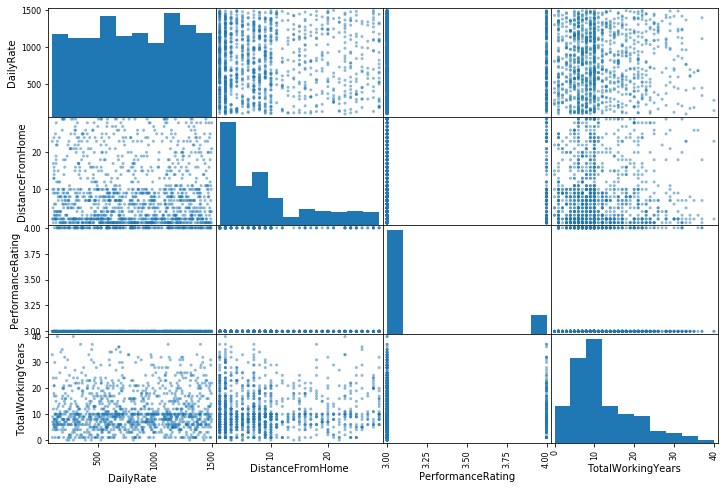

In [0]:
from pandas.plotting import scatter_matrix

attributes = ["DailyRate", "DistanceFromHome", "PerformanceRating",
              "TotalWorkingYears"]
scatter_matrix(df2[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

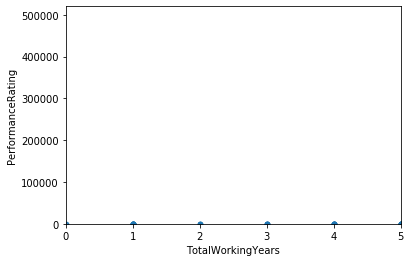

In [0]:

df2.plot(kind="scatter", x="TotalWorkingYears", y="PerformanceRating",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()


In [0]:
df2.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.854592,809.947279,9.044218,2.914966,1.0,1010.397959,2.737245,65.404762,2.732143,2.079932,2.713435,6531.003401,14385.496599,2.733844,15.240646,3.157313,2.747449,80.0,0.799320,11.338435,2.778061,2.760204,7.054422,4.254252,2.232143,4.175170
std,8.985006,401.410741,8.066094,1.010370,0.0,600.259449,1.096147,20.345261,0.708985,1.090963,1.108738,4635.731866,7117.867428,2.508826,3.676828,0.364250,1.086862,0.0,0.850852,7.722380,1.286617,0.702807,6.167624,3.625557,3.346084,3.620264
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,477.000000,2.000000,2.000000,1.0,477.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2978.500000,8057.500000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,809.000000,7.000000,3.000000,1.0,1004.500000,3.000000,65.500000,3.000000,2.000000,3.000000,5008.000000,14288.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1162.000000,13.000000,4.000000,1.0,1541.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8516.000000,20527.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [0]:
df2 = strat_train_set.drop("PerformanceRating", axis=1) # drop labels for training set
housing_labels = strat_train_set["PerformanceRating"].copy()

In [0]:
sample_incomplete_rows = df2[df2.isnull().any(axis=1)].head()
sample_incomplete_rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [0]:
sample_incomplete_rows.dropna(subset=["NumCompaniesWorked"]) 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [0]:
num=df2.median().values